In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix,classification_report
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import ML_functions ## a self-created script, known as ML_functions.py
style.use('ggplot')

In [2]:
#data = pd.read_csv("forest C vs C.csv")
data = pd.read_csv('multivariate.csv')
data = data.sort_values(by = "Label",ascending = False)
## Divide data into numerical data and label
status = pd.DataFrame(data["Label"])
data_df = pd.DataFrame(data.iloc[:,1:])
data_df.shape

(388, 337)

Remove top 12 proteins and highly correlated fragments

In [3]:
data_df = ML_functions.remove_depletion_protein(data_df)
highcorr  = []
data_df,highcorr = ML_functions.remove_highcorr(data_df)
data_df.insert(2,'P02745',data['P02745'])
data_df

31 columns will be removed
48 genes are found to be strongly correlated
(388, 262)


,B9A064,O00187,P02745,O00533,O14786,O14791,O15230,O43866,O76074,O95497,...,P32121,Q15910,Q6UX71,Q96EE4,P27487,Q13822,P04899,Q9UNN8,P30307,Label
194,8.621682,8.583763,10.925911,8.841914,8.798480,9.846299,10.016659,7.690461,9.471731,1.000000,...,1.000000,1.000000,8.355778,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Pre
198,11.835369,8.207081,10.611160,8.243589,1.000000,10.502458,1.000000,8.947694,9.566605,1.000000,...,1.000000,1.000000,7.607551,8.976019,1.000000,1.000000,1.000000,1.000000,1.0,Pre
164,1.000000,9.468476,11.137568,9.087989,8.342981,10.162782,1.000000,9.111805,10.102304,9.444173,...,1.000000,1.000000,8.573684,8.929030,7.402838,9.021562,7.667542,1.000000,1.0,Pre
167,13.517015,9.168977,10.745017,8.384514,1.000000,10.114492,9.920516,7.575528,11.088720,8.847813,...,1.000000,1.000000,7.892095,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Pre
174,15.485654,9.031232,11.103111,8.453298,1.000000,10.561401,9.517723,9.743798,10.075212,9.136354,...,10.268803,10.137243,8.127602,8.714242,1.000000,1.000000,1.000000,1.000000,1.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,1.000000,9.079979,9.802278,8.989743,1.000000,9.786801,9.652268,10.041407,9.192863,7.258868,...,1.000000,1.000000,1.000000,8.468551,1.000000,9.270313,5.988788,9.350832,1.0,Active Surveillance
222,11.597250,9.061052,10.086555,9.084673,1.000000,10.212270,1.000000,8.065993,9.886309,8.769607,...,1.000000,10.636905,7.939965,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Active Surveillance
219,12.526395,9.121095,10.507741,9.327767,8.519525,9.979156,10.883747,11.662955,9.591059,8.916727,...,1.000000,1.000000,9.121197,1.000000,6.913922,9.113025,5.795173,1.000000,1.0,Active Surveillance
218,7.743628,8.690627,10.097516,9.318995,1.000000,9.952983,1.000000,8.374099,9.832619,9.535124,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Active Surveillance


Select Important Feature 

In [4]:
RF_feature = ['P07996', 'P18428', 'P02745', 'P02766', 'P01019', 'P08185',
       'P02776', 'P43251', 'P05154', 'P19652','P07737','P27169']
data_RF = data_df[RF_feature]
data_RF

,P07996,P18428,P02745,P02766,P01019,P08185,P02776,P43251,P05154,P19652,P07737,P27169
194,10.303190,8.888613,10.925911,11.117617,13.071721,11.567790,10.612641,9.967547,10.064143,13.486288,1.000000,10.706193
198,10.055988,9.172213,10.611160,10.772075,12.781151,11.347571,10.767163,9.660730,10.720095,14.174420,1.000000,10.678816
164,10.333787,9.855041,11.137568,11.900103,13.225720,12.226436,11.380734,10.586364,8.374853,12.129563,8.919497,9.561383
167,9.879914,10.356878,10.745017,12.462250,12.975944,11.642783,10.892314,10.595172,11.148293,14.711875,1.000000,11.224509
174,11.315914,9.096563,11.103111,12.478862,13.470131,12.276476,11.656628,10.601713,10.250927,14.402391,1.000000,12.263142
...,...,...,...,...,...,...,...,...,...,...,...,...
46,10.042175,8.365519,9.802278,12.070675,13.301265,11.829199,9.997813,9.534477,10.334362,13.666320,1.000000,11.538247
222,9.985900,7.922059,10.086555,12.312717,13.549315,12.299624,10.549944,10.750864,10.900942,14.873980,7.922335,11.889949
219,11.189500,9.901272,10.507741,12.302962,13.416871,11.912808,11.204166,10.228462,10.996997,14.287336,7.923093,10.989949
218,9.803258,8.407630,10.097516,11.043135,12.407750,10.893883,11.324949,9.545186,8.638807,13.287782,1.000000,10.855986


Transform non numerical labels into numerical labels

In [5]:
encoder = preprocessing.LabelEncoder()
encoder.fit(status)
status_ = encoder.transform(status)
encoder.classes_

c:\users\457970640\anaconda3\envs\random_forest\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\457970640\anaconda3\envs\random_forest\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Active Surveillance', 'Control', 'No Cancer', 'Post', 'Pre'],
      dtype=object)

Split Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_RF, status_)
y_test

array([4, 4, 3, 1, 1, 2, 4, 1, 1, 1, 0, 3, 4, 4, 3, 4, 3, 0, 1, 4, 3, 2,
       3, 0, 1, 1, 4, 1, 1, 4, 4, 1, 4, 4, 4, 3, 0, 1, 4, 0, 0, 1, 1, 1,
       4, 0, 4, 4, 4, 3, 1, 4, 1, 1, 2, 1, 1, 0, 3, 1, 3, 3, 1, 0, 4, 0,
       0, 1, 1, 4, 1, 1, 1, 4, 4, 2, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 3,
       1, 1, 4, 4, 0, 2, 1, 1, 0])

Standardisation of the dataset for RBF kernal in SVM

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyperparameter tuning using grid search and cross validation 

In [8]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Training SVM model using radial kernel

In [9]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Confusion Matrix and Accuracy Score 

In [10]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

Best score for training data: 0.5260666277030976 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [11]:
print(confusion_matrix(encoder.inverse_transform(y_test),Y_pred_label))
print(classification_report(encoder.inverse_transform(y_test),Y_pred_label))
print('Best score for training data:', svm_model.best_score_,"\n") 

[[ 4  1  0  1  7]
 [ 0 28  1  1  8]
 [ 2  0  0  0  3]
 [ 0  4  0  4  4]
 [ 3  6  0  1 19]]
                     precision    recall  f1-score   support

Active Surveillance       0.44      0.31      0.36        13
            Control       0.72      0.74      0.73        38
          No Cancer       0.00      0.00      0.00         5
               Post       0.57      0.33      0.42        12
                Pre       0.46      0.66      0.54        29

           accuracy                           0.57        97
          macro avg       0.44      0.41      0.41        97
       weighted avg       0.55      0.57      0.55        97

Best score for training data: 0.5260666277030976 



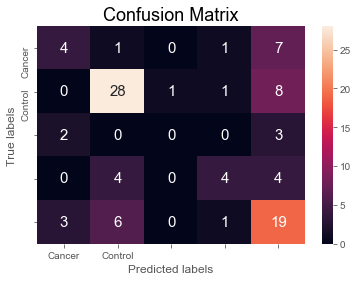

In [12]:
from sklearn.metrics import confusion_matrix
#labels = [0,1]
result = Y_pred
cm = confusion_matrix (y_test,result)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,annot_kws={'size':15},cmap=None); #annot=True to annotate cells

# labels, title and ticks
sns.set(font_scale=1.5)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.set_ylim([0,2]) ## correct the display of sns plot
ax.xaxis.set_ticklabels(['Cancer', 'Control']); ax.yaxis.set_ticklabels(['Cancer', 'Control']);

In [13]:
count_0 = 0
count_1 = 0
for j in y_test:
    if j == 0:
        count_0 += 1
    if j ==1:
        count_1 += 1
print(count_0)
print(count_1)

13
38
